In [59]:
import pandas as pd

ANALISIS DE LOS DATOS ESTATICOS BASICOS

In [60]:
#Cargar datos reales estaticos SIMPLES
df_real = pd.read_csv("final_static_data_basic.csv")

In [61]:
df_real_limpio = df_real.iloc[:, 1:]

In [62]:
#Ver nºcolumnas, tipos de datos y valores nulos
print(df_real_limpio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45367 entries, 0 to 45366
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MMSI          45367 non-null  int64  
 1   draught       45367 non-null  float64
 2   to_bow        45367 non-null  float64
 3   to_stern      45367 non-null  float64
 4   to_port       45367 non-null  float64
 5   to_starboard  45367 non-null  float64
 6   shiptype      45367 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 2.4+ MB
None


In [63]:
print(df_real['MMSI'].value_counts())

MMSI
992576503    1
5            1
6            1
1458         1
2829         1
            ..
1138285      1
1137416      1
1135961      1
1135873      1
1133802      1
Name: count, Length: 45367, dtype: int64


In [64]:
#Distribucion de los tipos de barcos
print(df_real["shiptype"].value_counts())


shiptype
ShipType.Cargo        22097
ShipType.Tanker        8986
ShipType.Tug           5821
ShipType.Fishing       5551
ShipType.Passenger     2912
Name: count, dtype: int64


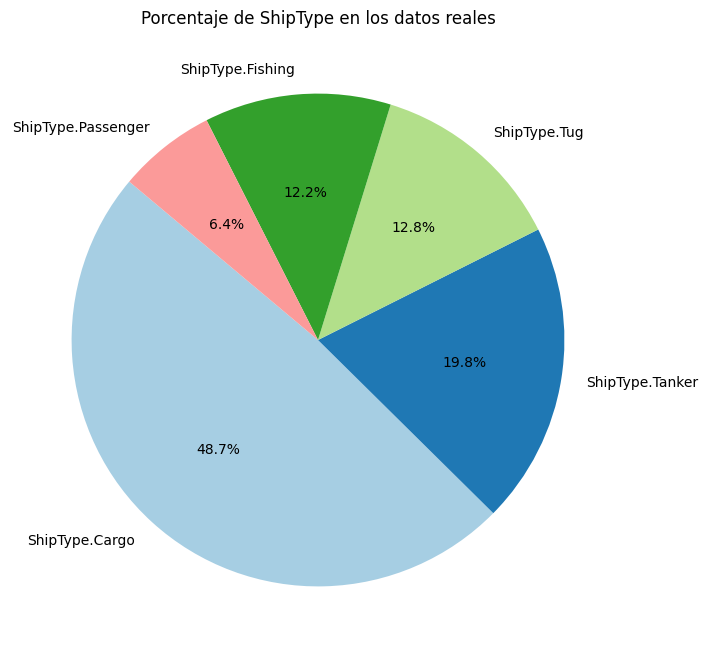

In [65]:
#Porcentaje de cada shiptype
shiptype_percentage = df_real["shiptype"].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(shiptype_percentage, labels=shiptype_percentage.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Porcentaje de ShipType en los datos reales")
plt.show()

In [66]:
# Eliminar las columnas 'MMSI' 
df_real_limpio = df_real.drop(columns=['MMSI'])

In [67]:
# Obtener los tipos de barco únicos
tipos_barco = df_real_limpio["shiptype"].unique()

In [68]:
# Estadísticas descriptivas
# Agrupar por shiptype
stats_real = df_real_limpio.groupby("shiptype").describe()
# Mostrar estadísticas de cada tipo de barco
for shiptype in df_real_limpio["shiptype"].unique():
    print(f"\n📊 Estadísticas para {shiptype} (Datos Reales):\n")
    print(stats_real.loc[shiptype])


📊 Estadísticas para ShipType.Tug (Datos Reales):

Unnamed: 0    count     5821.000000
              mean     21590.936265
              std      11766.417603
              min          0.000000
              25%      12811.000000
              50%      22299.000000
              75%      28305.000000
              max      45365.000000
draught       count     5821.000000
              mean         4.027520
              std          1.255800
              min          1.500000
              25%          3.000000
              50%          4.000000
              75%          5.000000
              max          8.300000
to_bow        count     5821.000000
              mean        12.769924
              std          9.227688
              min          0.000000
              25%          9.000000
              50%         11.000000
              75%         15.000000
              max        128.000000
to_stern      count     5821.000000
              mean        20.015678
             

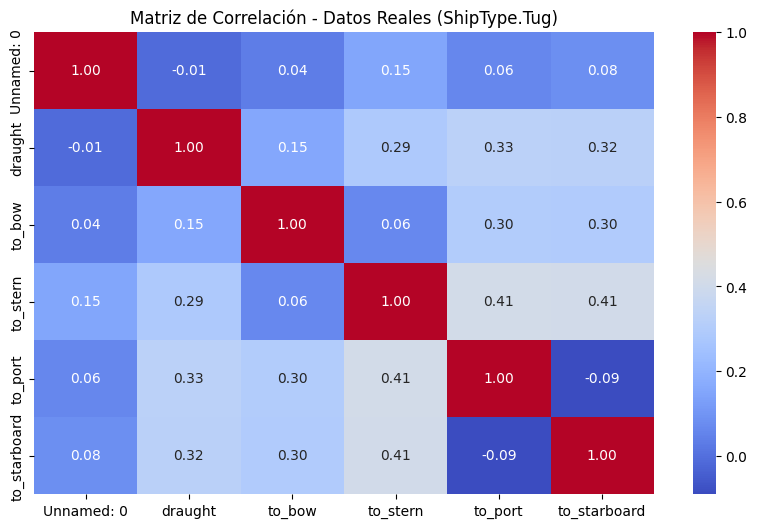

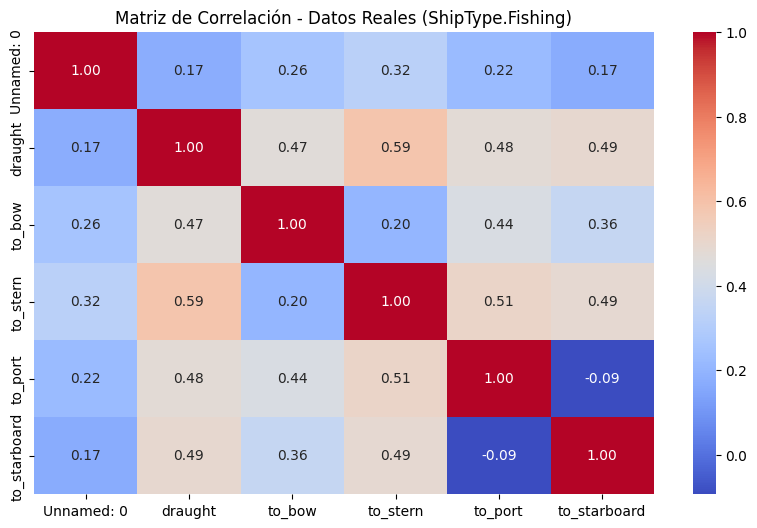

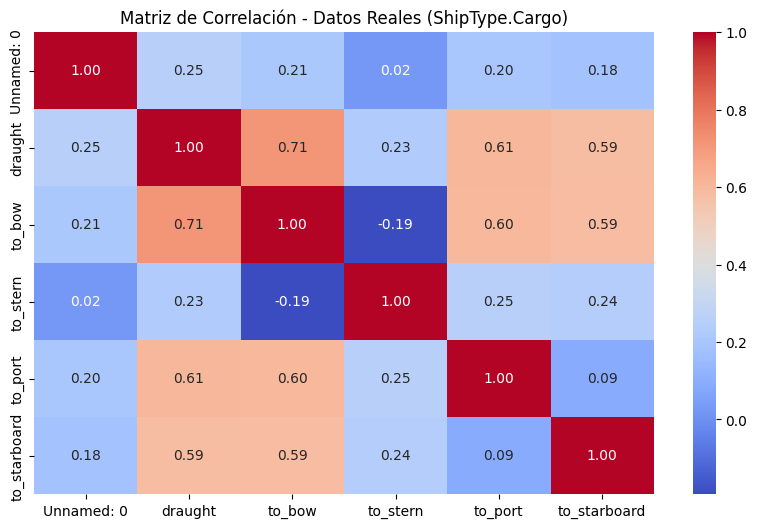

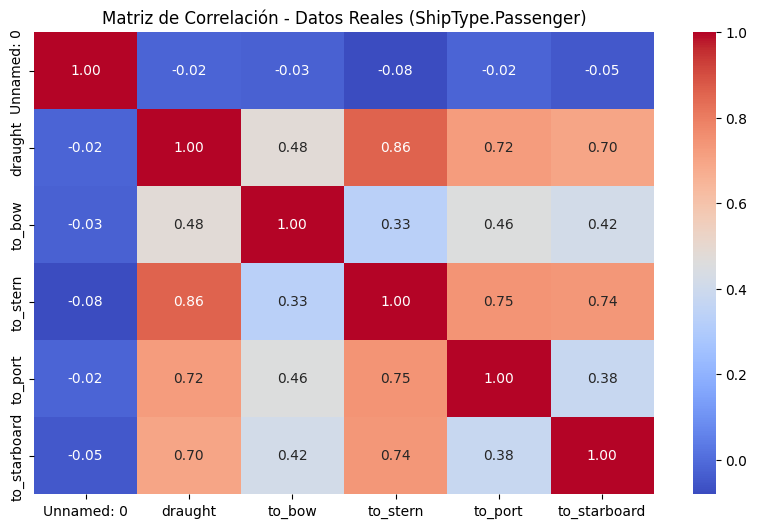

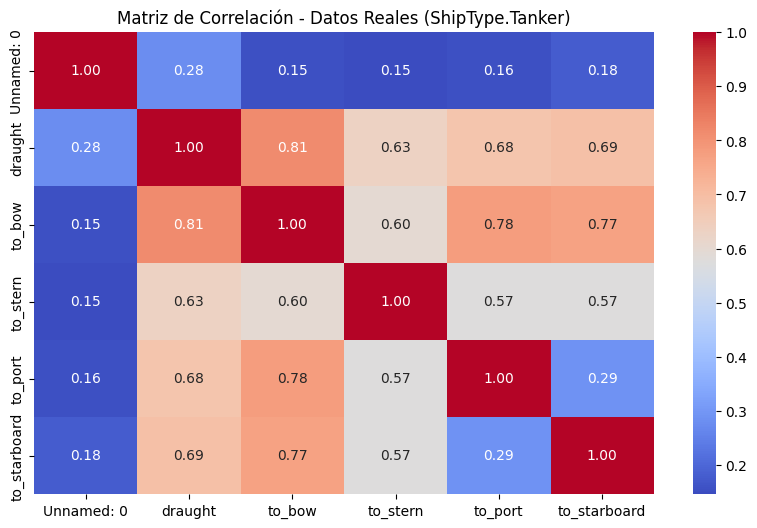

In [69]:
# Graficar las matrices de correlación

import seaborn as sns

for ship in tipos_barco:
    df_corr_real = df_real_limpio[df_real["shiptype"] == ship].select_dtypes(include=[np.number])
    
    if not df_corr_real.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df_corr_real.corr(), cmap="coolwarm", annot=True, fmt=".2f")
        plt.title(f"Matriz de Correlación - Datos Reales ({ship})")
        plt.show()

In [79]:
#Cargar datos reales estaticos SIMPLES
df_real = pd.read_csv("final_static_data_basic.csv")
df_real_limpio = df_real.iloc[:, 1:]


In [81]:
# Filtrar solo columnas numéricas (excluyendo 'MMSI')
variables_numericas = [
    col for col in df_real_limpio.select_dtypes(include='number').columns
    if col not in ['MMSI']
]

# Lista para guardar resultados
resultados = []

# Iterar por cada tipo de barco
for tipo in sorted(df_real_limpio['shiptype'].dropna().unique()):
    subset = df_real_limpio[df_real_limpio['shiptype'] == tipo]
    
    for columna in variables_numericas:
        n_unicos = subset[columna].dropna().nunique()
        resultados.append({
            'shiptype': tipo,
            'variable': columna,
            'unique_values': n_unicos,
            'total_values': subset[columna].dropna().shape[0],
            '%_unique_Real': round((n_unicos / subset[columna].dropna().shape[0]) * 100, 2) if subset[columna].dropna().shape[0] > 0 else 0
        })

# Convertir a DataFrame
df_unicos = pd.DataFrame(resultados)

print(df_unicos)

              shiptype      variable  unique_values  total_values  \
0       ShipType.Cargo       draught          17053         22097   
1       ShipType.Cargo        to_bow           2036         22097   
2       ShipType.Cargo      to_stern           1934         22097   
3       ShipType.Cargo       to_port           3115         22097   
4       ShipType.Cargo  to_starboard           3118         22097   
5     ShipType.Fishing       draught            441          5551   
6     ShipType.Fishing        to_bow            481          5551   
7     ShipType.Fishing      to_stern            498          5551   
8     ShipType.Fishing       to_port            591          5551   
9     ShipType.Fishing  to_starboard            583          5551   
10  ShipType.Passenger       draught            422          2912   
11  ShipType.Passenger        to_bow            398          2912   
12  ShipType.Passenger      to_stern            548          2912   
13  ShipType.Passenger       to_po

ANALISIS DATOS ESTATICOS COMPLETOS

In [75]:
# Cargar el dataset completo
df = pd.read_csv("final_static_data.csv")

In [76]:
# Mostrar nombres de columnas y tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45367 entries, 0 to 45366
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MMSI          45367 non-null  int64  
 1   draught       45367 non-null  float64
 2   to_bow        45367 non-null  float64
 3   to_stern      45367 non-null  float64
 4   to_port       45367 non-null  float64
 5   to_starboard  45367 non-null  float64
 6   len           45367 non-null  float64
 7   wid           45367 non-null  float64
 8   ldivw         45367 non-null  float64
 9   ldivd         45367 non-null  float64
 10  wdivd         45367 non-null  float64
 11  area          45367 non-null  float64
 12  grith         45367 non-null  float64
 13  aml           45367 non-null  float64
 14  amt           45367 non-null  float64
 15  vs            45367 non-null  float64
 16  aol           45367 non-null  float64
 17  shiptype      45367 non-null  object 
dtypes: float64(16), int64(1), 

In [78]:
# Filtrar solo columnas numéricas (excluyendo 'MMSI')
variables_numericas = [
    col for col in df.select_dtypes(include='number').columns
    if col not in ['MMSI']
]

# Lista para guardar resultados
resultados = []

# Iterar por cada tipo de barco
for tipo in sorted(df['shiptype'].dropna().unique()):
    subset = df[df['shiptype'] == tipo]
    
    for columna in variables_numericas:
        n_unicos = subset[columna].dropna().nunique()
        resultados.append({
            'shiptype': tipo,
            'variable': columna,
            'unique_values': n_unicos,
            'total_values': subset[columna].dropna().shape[0],
            'percent_unique': round((n_unicos / subset[columna].dropna().shape[0]) * 100, 2) if subset[columna].dropna().shape[0] > 0 else 0
        })

# Convertir a DataFrame
df_unicos = pd.DataFrame(resultados)

print(df_unicos)

# Guardar en CSV
df_unicos.to_csv("valores_unicos_reales completo.csv", index=False)

          shiptype      variable  unique_values  total_values  percent_unique
0   ShipType.Cargo       draught          17053         22097           77.17
1   ShipType.Cargo        to_bow           2036         22097            9.21
2   ShipType.Cargo      to_stern           1934         22097            8.75
3   ShipType.Cargo       to_port           3115         22097           14.10
4   ShipType.Cargo  to_starboard           3118         22097           14.11
..             ...           ...            ...           ...             ...
75    ShipType.Tug         grith            408          5821            7.01
76    ShipType.Tug           aml           1728          5821           29.69
77    ShipType.Tug           amt           1234          5821           21.20
78    ShipType.Tug            vs           2723          5821           46.78
79    ShipType.Tug           aol           1154          5821           19.82

[80 rows x 5 columns]
